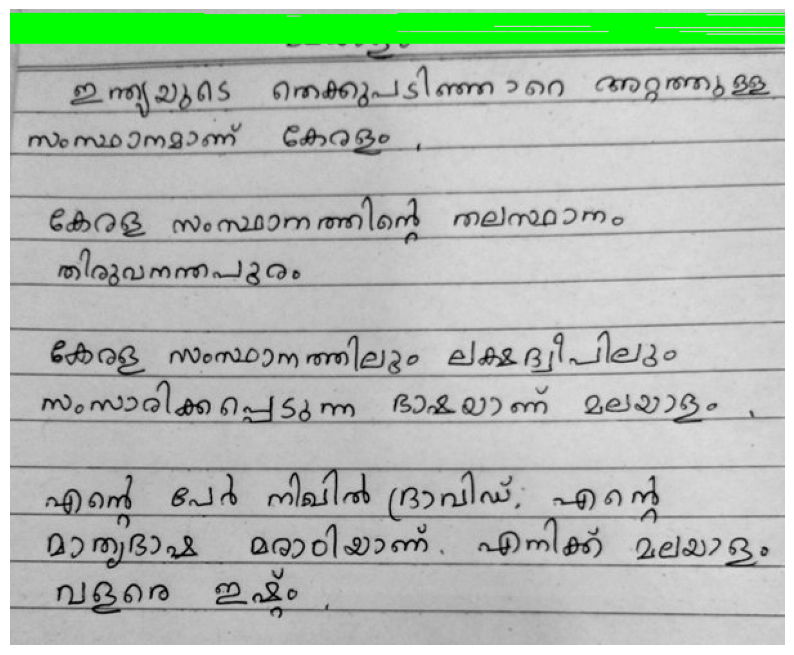

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_projection_profile(image, axis=0):
    """Find the projection profile of foreground pixels along the specified axis."""
    projection = np.sum(image, axis=axis)
    return projection

def smooth_projection_profile(projection, window_size=5):
    """Smooth the projection profile using a simple moving average filter."""
    smoothed_projection = np.convolve(projection, np.ones(window_size)/window_size, mode='same')
    return smoothed_projection

def find_valleys(projection):
    """Find valleys in the projection profile."""
    valleys = []
    for i in range(1, len(projection) - 1):
        if projection[i] < projection[i-1] and projection[i] < projection[i+1]:
            valleys.append(i)
    return valleys

def find_candidate_lines(projection_profiles):
    """Find candidate lines using valleys in the projection profiles."""
    candidate_lines = []
    for i in range(len(projection_profiles) - 1):
        valleys1 = find_valleys(projection_profiles[i])
        valleys2 = find_valleys(projection_profiles[i+1])
        for valley1 in valleys1:
            min_distance = float('inf')
            closest_valley2 = None
            for valley2 in valleys2:
                distance = abs(valley2 - valley1)
                if distance < min_distance:
                    min_distance = distance
                    closest_valley2 = valley2
            candidate_lines.append((valley1, closest_valley2))
    return candidate_lines

def draw_candidate_lines(image, candidate_lines):
    """Draw candidate lines on the image."""
    for line in candidate_lines:
        cv2.line(image, (0, line[0]), (image.shape[1], line[1]), (0, 255, 0), 1)
    return image

# Load the image
img = cv2.imread('mal-hw.jpeg', cv2.IMREAD_GRAYSCALE)

# Smooth the projection profile
smoothed_profiles = []
for i in range(20):
    chunk = img[:, int(i*img.shape[1]//20):int((i+1)*img.shape[1]//20)]
    projection = find_projection_profile(chunk)
    smoothed_projection = smooth_projection_profile(projection)
    smoothed_profiles.append(smoothed_projection)

# Find candidate lines
candidate_lines = find_candidate_lines(smoothed_profiles)

# Draw candidate lines on the image
image_with_lines = draw_candidate_lines(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), candidate_lines)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_with_lines)
plt.axis('off')
plt.show()
